# Measuring Non-Linear Associations

## Objective
The objective of this project is to compare three different measures of association (*A*, distance correlation (*dcor*) and Maximal Information Coefficient (*MIC*) at identifying inter-variable relationships and use these to develop efficient methods for analysing relationships in large biological datasets. The comparisons are based on simulated data.

## Motivation
Big data is a fashionable term currently sweeping through the corporate world. While not strictly defined, it typically refers to large, complex datasets that are too big to be managed using traditional methods. Depending on the definition, different statistical and computational challenges are posed. Examples of big data within pharmaceutical research include gene expression data, medical histories and clinical trial data. Often these have many more parameters than observations so $p >> n$. The availability of these datasets combined with recent developments for identifying associations between variables offers the potential to improve biological understanding which can in turn aid in the development of treatments for different diseases.

One of the main purposes of association analysis is to produce an ordered list of variable pairs ranked by the strength of association. Typically these would form the basis of a more in-depth statistical analysis or highlight areas for further investigation or experimentation. The size of the datasets raises challenges for exploratory association mining. For example, when investigating $n$ pairwise combinations of variables there are $\frac{1}{2} \times n \times (n-1)$ combinations so that even for a dataset of 100 variables, there are 4095 different pairs to be analysed. 

A desirable property of estimators of association is that they can identify a range of different functional relationships equally and not for example be limited to just linear relationships, as is the case with Pearson correlation. It is also important that different measures of association have sufficient statistical power when dealing with relatively small sample sizes. The situation becomes more complex when investigating multivariate associations or controlling for specific variables. Therefore automated, robust and efficient approaches to searching very large collections of variables are needed.

## Non-Linearity and Association
A linear function of two random variables is one that can be written in the form:

$y = ax + b$

where a and b are constants. Thus a non-linear function is a relationship which cannot be written as a linear combination of the the variables. Some examples of nonlinear functions are given below.

If no relationship exists between two random variables they are said to be statistically independent. Formally, two events $A$ and $B$ are defined to be independent if:

$P(A \cap B) = P(A)P(B)$
 
Conversely, if two random variables $X$ and $Y$ are dependent then as $X$ changes in value, the value $Y$ will also change and vice versa. Association measures the statistical dependence between two of more random variables. In the case of two random variables this is a symmetric relationship.

## Properties
Two potentially desirable properties of measures of association are:

* **Generality**: The ability to detect any departure from independence given a suffiiciently large sample.
* **Equitibility**: The ability to assign similar values of association to equally noisy relationships of different types.

The equitability property is of particular interest in large scale association studies as it offers the potential to efficiently search for pairwise relationships of different types in large datasets. It has attracted considerable interest in the context of biological studies as a heuristic approach to discovering associations of interest. However, the property has also drawn criticism due to the fact that unless the measure has sufficient statistical power, inflated false discovery may reduce the utility of a given measure of association despite the equitability property. Subsequent work by [Kinney](http://www.pnas.org/content/111/33/E3364.short), which established a mathematical foundation for equitability based on $R^2$, suggests that $R^2$ equitability cannot be satisfied by any measure of association and therefore offers little practical value in exploratory analysis. However they introduced the notion of 'self-equibality' which is falsifiable and therefore offers a way to compare measures of association. Kinney proved that *MIC* is not self-equitable but that an information theortic measure called mutual information is and hence has potential for large scale association studies.

## Some Estimators of Association

### Pearson's Correlation

The  Pearson correlation coeﬃecent, $\rho$, measures the strenth and direction of a linear association between two r.v.’s, $X$ and $Y$. It is deﬁned as


$\rho = \frac{cov(X,Y)}{\sigma_X \sigma_Y}$

where $cov(X,Y)$ is the covariance between $X$ and $Y$ and $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$ respectively.

The sample correlation coefficient is estimated as follows:

$\hat{\rho} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{s_X s_Y}$

where $\bar{x}$ and $\bar{y}$ are the sample means and $s_X$ and $s_Y$ the sample standard deviations of $X$ and $Y$ respectively. $R^2$  is known as the coefficient of determination and measures the amount of observed variance explained by a function. In the case of a linear relationship between two variables, $R^2 = \rho^2$. When the form of the functional relationship between two variables is unknown, obtaining a value of $R^2$ is more [challenging]( http://arxiv.org/pdf/1303.1828v1.pdf) and has led to the development of many other measures of association.

### Spearman's Rank Correlation
Spearman's rank correlation is a non-parametric measure of association of paired data. For two r.v.'s $X$ and $Y$, it is calculated by ordering the $x$'s and $y$'s separately and then calculating the differences $d$ in the rank order between the two. Therefore a Spearman correlation of $1$ means that $X$ and $Y$ are in the same order. When ignoring ties it is given by the following formula:

$ \rho_s = 1-\frac{6 \sum_{i=1}^n d_i^2}{n(n^2-1)} $

While Spearman's rank can describe non-linear relationships better than Pearson's correlation, it has been shown to not be equitable \cite{mic2011}.


### Maximal Information Coefficient
Maximal Information Coefficient ($MIC$) is based on the concept that if two random variables, $X$ and $Y$ are associated, the association can be defined by drawing a grid on a scatterplot of $X$ vs. $Y$. An outline of the algorithm for calculating $MIC$ is as follows:

1. For each pair of r.v.'s $X$ and $Y$ find the grid between $X$ and $Y$ with the highest mutual information (a measure of the variables' mutual dependence). A tuning parameter is to control the level of discretisation in this step.
2. Normalise the mutual information scores in order to allow fair comparison of grids (grid dimensions may differ between pairs).
3. The normalised scores form a characteristic matrix, the maximum of which is the $MIC$ score.

$MIC$ is implemented in the R [$minerva$](http://CRAN.R-project.org/package=minerva) package.

### *A*
$A$ is a probabilistic measure of association that generalises $R^2$. It has a number of attractive features that make it of potential interest for association analysis, in particular the fact that it is reported\cite{Murrel:2013:Online} to have greater power than other measures of association such as $MIC$ and $dcor$, it extends to the multivariate case (e.g. how $Y$ is associated with both $X$ and $Z$) and can also measure association while controlling for covariates (i.e. partial association, the association between $Y$ and $X$ while controlling for $Z$). Additionally it is also [reported]( http://arxiv.org/pdf/1303.1828v1.pdf) to be both general and equitable.

In the case of simple linear regression $y = f(x) + \epsilon$, $R^2$ quantifies the amount of observed systematic variation, while the residuals are assumed to be Normally distributed around $f(x)$. $A$ is based on the following reformulation of $R^2$:

$R^2 = 1-\prod_i(\frac{P(x_i,y_i|null)}{P(x_i,y_i|alt)})^{\frac{2}{n}}$

which defines $R^2$ in terms of the probability density of the null and alternative models. In the case of $A$, $\hat{A}$ can be estimated if suitable models for the null and alternative hypotheses can be found. In practice this involves estimating the density at each point of the null and alternative models using kernel density estimation. The choice of null is taken to enforce independence so $P(X,Y)=P(X)P(Y)$, while the alternative is is allowed to be dependent. For a detailed technical description see [Murrell]( http://arxiv.org/pdf/1303.1828v1.pdf). For simplicity the remainder of this document refers to $\hat{A}$ as $A$ unless explicitly stated otherwise.  It is implemented in the R [$matie$](https://cran.r-project.org/web/packages/matie/index.html) package.

### Distance Correlation
Distance correlation aims to measure all types of dependence between two or more random variables. For two random vectors $X$ and $Y$ of size $n$, $dcor$ is computed as follows:

1. Compute a distance matrix of all pairwise distances between samples of the $X$ variable.
2. Compute the corresponding distance matrix for the $Y$ variable.
3. Mean centre both distance matrices, giving two distance matrices, $A_{k,l}$ and $B_{k,l}$, where $k$ and $l$ are the respective row and column indices.
4. Calculate the distance covariance: $dcov(X,Y) = \sqrt{\frac{1}{n^2} \sum^n_{k=1,l=1}A_{k,l}B_{k,l}}$.
5. Scale the distance covariance to give the distance correlation: 

$dcor(X,Y) = \frac{dcov(X,Y)}{\sqrt{dcov(X,X)dcov(Y,Y)}}$

$dcor$ is implemented in the R [$energy$]( http://CRAN.R-project.org/package=energy) package.


## Assessing Non-Linearity

The three association measures $MIC$, $A$ and $dcor$ all aim to measure all types of dependence, linear and non-linear, monotonic and non-monotonic etc. between pairs of random variables equally, however none explicitly measures the non-linear association. 
There are a number of possible ways of trying to assess the amount of non-linear association by partitioning the observed association into linear and non-linear components. \citet{Murrel:2013:Online} implement the following different measures of non-linearity based on $A$ and $R^2$ in the $matie$ R package \cite{matie}. They have been generalised here so that $\theta$ refers to any association measure.

* Residual association ($r \theta$), the association of random variables after the linear relationship has been regressed out using a standard linear model. 
* Difference, the non-linear part of the association, $\theta - R^2$. 
* The non-linear proportion of association, $\frac{(\theta-R^2)}{\theta}$
* The proportion of total variance that is explained by $\theta$ but not by $R^2$, $\frac{(\theta-R^2)}{1 -\theta^2}$.

# Simulation
Simulation was used to study a number of measures of association. The aim was to assess their utility and limitations for use in exploratory association mining in general and for the lupus dataset in particular. The analysis focused on how the statistical power of each association measures varies with noise and sample size.

Statistical power refers to the ability to identify correctly the null hypothesis when it is true. In the case of dependence the hypothesis is that two or more sets of data are independent while the alternative hypothesis is that they are dependent. Formally, for two random variables $X$ and $Y$: 

$H_0$: $X$ and $Y$ are independent.

$H_1$: $X$ and $Y$ are dependent.

A previous simulation study by [Simon and Tibshirani]( http://statweb.stanford.edu/~tibs/reshef/comment.pdf) into the power of $MIC$ vs. $dcor$ found that in most cases $dcor$ was more powerful than $MIC$ and that in the linear case $MIC$ was less powerful than Pearson correlation. This power deficiency led the authors to advocate the use of $dcor$ over $MIC$ in large scale exploratory analysis as $MIC$ might lead to too many false positives. 

This simulation study extends the aforementioned study by including the $A$ score, expanding the range of functional relationships explored, studying the effect of differing sample size and also using two source distributions. 

The original study used a $Uniform(0,1)$ to generate data which were then used to create dependent and independent sets of random variables $X$ and $Y$. The procedure is as follows: 

Let $X$, $Y$ and $Z$ be random variables and let $f(X)$ be a function of interest. For the dependant data: $X\sim U(0,1)$ and $Y = f(X)$. For the independent data: $X\sim U(0,1)$, $Z\sim U(0,1)$  and $Y = f(Z)$.


Their motivation for choosing $Uniform(0,1)$ distribution was primarily because the authors of $MIC$ had used it in their simulation studies. Exploratory analysis of the [lupus](https://github.com/fjro/lupus) dataset suggested that many of the gene expressions have positively skewed distributions, so a $Beta(2,5)$ distribution was used to simulate this. 

The main interest was in comparing $A$, $MIC$ and $dcor$.  Pearson and Spearman correlation were also included for contrast. Fifteen different functional relationships were studied. Normally distributed noise was added to each function so that, $y = f(x) + l \times \epsilon$, where $l$ is a scaling parameter controlling the level of noise, $\epsilon$, and $\epsilon \sim N(0, 1)$. In the case of the cubic, exponential, log, step, spike and sine based functions, $l$ was scaled to compensate for the range of $y$. The proceeding block plots each of these for a sample size of 320 with minimal noise.

![Function Types](forms.png)

## Power Estimation
In order for an association measure to be practically useful in association analysis it should have reasonable statistical power for noisy data. Ideally it should also be equitable, i.e. it should score equally different types of relationships with equal amounts of noise added. This simulation explored how statistical power varied for the different functional forms for different amounts of Normally distributed noise and sample sizes. 

Data was generated using two  distributions, \textit{Uniform(0.1)} and \textit{Beta(2,5)}, so for a  r.v. $X$, $X \in \{0,1\}$. Random noise was generated from a $N(0,1)$ distribution and then scaled by a given noise level (0.1 to 3). The following algorithm was used in the simulation to assess if two r.v.'s $X$ and $Y$ were dependent:

1. For each functional form, $f$, noise level, $l$ and smaple size $n$:
2. Generate independent r.v.'s $X,Y$ and $Z$: $X$ and $Z$ from the given distribution (so $X \in \{0,1\}, Z \in \{0,1\}$) and an independent r.v. $Y=f(Z) + l \times \epsilon$, where $\epsilon \sim N(0,1)$.
3. Measure the association between $X$ and $Y$ using each estimate of association $\theta$.
4. Generate dependent r.v.'s $X$ and $Y$: $X$ from the given distribution and a dependent r.v. $Y=f(X) + l \times \epsilon$, where $\epsilon \sim N(0,1)$. 
5. Measure the association between $X$ and $Y$ using using each estimate of association $\theta$.
6. Estimate the power as the number of times the association score for the dependent data exceeds the $95^{th}$ percentile of the corresponding score for the independent data.
7. Repeat $500$ times.

## Computation 
The simulations can be quite compute intensive depending on the sample sizes, noise levels, association estimates and function types used. The final code is designed for use on a single beefy laptop but could be easily be adapted to a more powerful compute cluster. [Snow](https://cran.r-project.org/web/packages/snow/snow.pdf) is used to distribute workload across cores or clusters. [RCpp](https://cran.r-project.org/web/packages/Rcpp/index.html) is used to implement each type of bivariate function. 

The implentation is in a functional style so it is easy to add estimates of new assoication measures or function types.

## Power vs. Noise
The R code is adapted from [Simon and Tibshirani](http://statweb.stanford.edu/~tibs/reshef/comment.pdf). The results below suggest that all measures are sensitive to the level of noise and that none of the measures has greater power for all of the functional forms simulated. In particular $A$ appears to have low power for the fourth root, step, exponential, sigmoid and linear cases. It also has lower power than $dcor$ in the cubic cases. Both $A$ and $MIC$ generally outperform $dcor$ for periodic functions most notably for the high frequency sine wave. Interestingly, $A$ has the highest power in detecting the circle and `X' shapes.

Simulation results from the skewed distribution were broadly similar to the Uniform case. For most functional forms there was a decrease in power, most notably for the step function which showed a reduction in power for all association measures. Both $A$ and $MIC$ also had lower power than Pearson correlation in the quadratic and cubic cases.

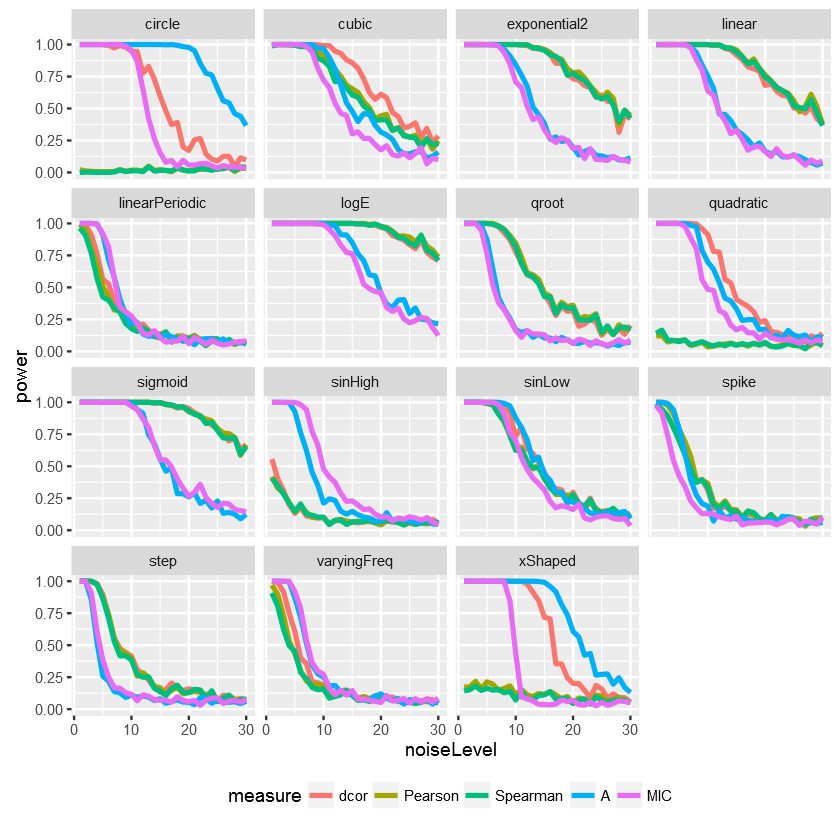

In [2]:
library(feather)
library(ggplot2)
powerResults <- read_feather("../data/powerResults.feather")

ggplot(powerResults[powerResults$Distribution == "Uniform" & powerResults$n == 350,], aes(noiseLevel, power, colour=measure)) +
  geom_line(size=1.1) +
  facet_wrap(~Function)+
  theme(legend.position="bottom")

## Power vs. Size
Typically for biological datasets the sample size, $n$, is relatively small (in the case of the lupus dataset $n = 420$), while $n > 1000$ would generally considered a large dataset. Hence to be of practical use an association measure should be sufficiently powerful at detecting associations on small datasets. This was the objective of this simulation. 


Again the algorithm was run with a \textit{Uniform(0,1)} distribution and then with a \textit{Beta(2,5)} distribution to see if a skewed source distribution affected the results. The results for the $Uniform$ case are given below. The results show that $A$, $MIC$ and $dcor$ only converged in certain cases but that $dcor$ converged more quickly (i.e. is more powerful on smaller sample sizes) in the linear, quadratic, cubic and exponential cases. The power of $dcor$ was again noticeably low in the high frequency sine case. No measures converged for the step, spike, linear+periodic or varying frequency functions function. $A$ and $MIC$ both failed to converge for $X^{\frac{1}{4}}$.

In the case of the skewed distribution, the performance of all measures generally declined, particularly for $A$ and $MIC$ in the quadratic and cubic cases. The power of $A$, $MIC$ and $dcor$ also reduced for the exponential function.

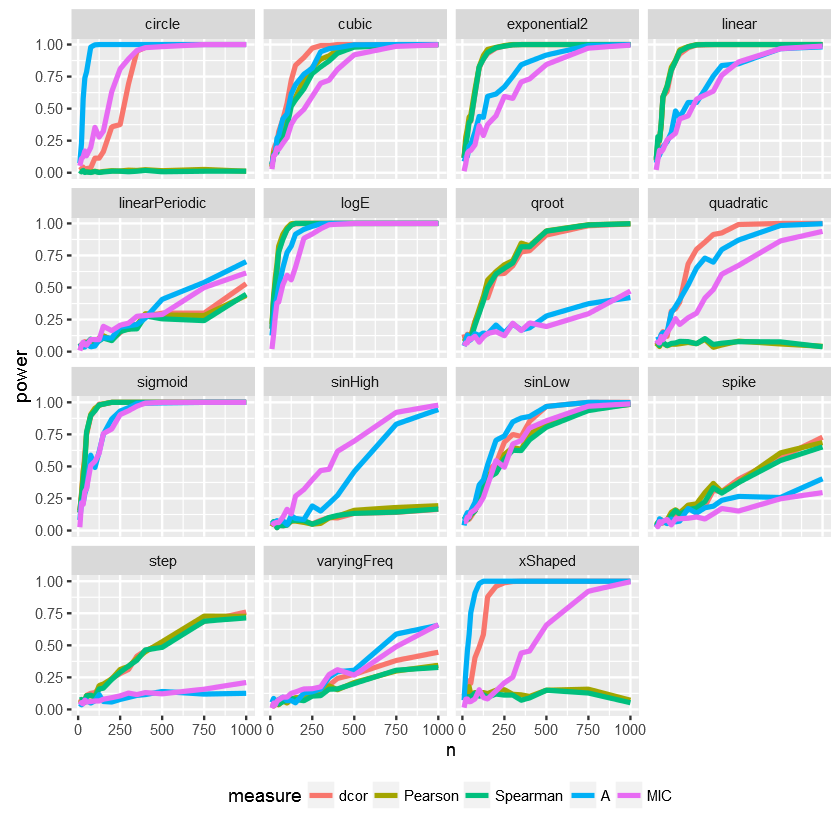

In [3]:
ggplot(powerResults[powerResults$Distribution == "Uniform" & powerResults$noiseLevel == 10,], aes(n, power, colour=measure)) +
  geom_line(size=1.1) +
  facet_wrap(~Function)+
  theme(legend.position="bottom")

The proceeding code block plots the complete power vs noise vs size profile as an interactive surface for each function type and association estimate.

In [4]:
library(plotly, quietly=TRUE)
library(tidyr, quietly=TRUE)


#3d surface of a single association measure for a single function type.
plotSurface <- function(res, measure, type, distribution) {
  powerEstimate <- res[res$measure == measure & res$Function == type & res$Distribution == distribution, c(1,2,5)]
  powerEstimate <- as.data.frame(spread(powerEstimate, noiseLevel, power))
  dim(powerEstimate)
  rownames(powerEstimate) <- powerEstimate[,1]
  powerEstimate<- as.matrix(powerEstimate[,-1])
  p <- plot_ly(z = powerEstimate, 
               x = as.numeric(colnames(powerEstimate)), 
               y = as.numeric(rownames(powerEstimate)), 
               type = "surface")%>% 
    layout(title = paste("Power of", measure, "for", type),
           scene = list(
             xaxis = list(title = "Noise"), 
             yaxis = list(title = "n"), 
             zaxis = list(title = "Power")))
  p
}

p <- plotSurface(powerResults, "Pearson", "sigmoid", "Uniform")
embed_notebook(p)


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:graphics':

    layout



## Discussion 

The simulation studies focused on how the power of the different measures of association perform in the presence of noise and with different sample sizes. This is of particular relevance to biological datasets which can contain a large amount of technical variability which is not of interest and typically have small sample sizes but many dimensions. 

Unsurprisingly the simulations showed that in general power decreases in the presence of increasing noise while power increases with increased sample size even in the presence of noise. Of greater importance is that the analysis suggested that $A$ suffers from some of the same power deficiencies as $MIC$ for certain important cases such as linear and cubic but both surpass $dcor$ where high frequency periodic variation exists. This appears to confirm the reservations regarding the equitability heuristic expressed by [Kinney](http://www.pnas.org/content/111/33/E3364.short). The size simulations questions the practical usefulness of the generality heuristic.

No one measure exceeded all of the others in all of the cases, however on balance the simulation study suggests that $dcor$ should perform better than either $MIC$ or $A$ on the basis of capacity to handle noise and deal with small sample sizes. From a practical perspective if the form of a relationships are unknown then $dcor$ would appear to be the best choice of association measure, possibly in conjunction with Pearson Correlation (to assess non-linearity) and either $A$ or $MIC$ if periodic effects are suspected or known a priori.

There are many other simulation based analyses that could be performed, e.g. expanding the range of functional forms and source distributions and to include three way and partial associations where possible. Additionally it would be of interest to explore  relative performance of [HHG](http://biomet.oxfordjournals.org/content/100/2/503.abstract) which has been identified as being of potential use for exploratory association mining. A further extension would be to study the sensitivity of both $A$ and $dcor$ to their respective tuning parameters. The bootstrap estimates of both $MIC$ and $A$ appeared to converge more closely with $dcor$ than their point estimates. This could also be studied through simulation.
